In [1]:
import numpy as np
def create_random_normal_chi(num_comps:int,chi_mean:float,chi_std:float)->np.ndarray:
    chi_mat = np.zeros((num_comps,num_comps))
    for i in range(num_comps):
        for j in range(i+1,num_comps):
            chi_mat[i,j] = np.random.normal(chi_mean,chi_std)
            chi_mat[j,i] = chi_mat[i,j]
    return chi_mat
num_comps = 3
chi_mean = 5
chi_std = 1
chis = create_random_normal_chi(num_comps,chi_mean,chi_std)
np.savetxt('chis.csv',chis)

In [2]:
import flory
import numpy as np

chis = np.loadtxt('chis.csv')
num_comp = chis.shape[0]
mesh_size = 10
phi_means = np.zeros(num_comp)
for i in range(num_comp-2):
    phi_means[i] = np.random.uniform(0,((num_comp-2)/num_comp)-sum(phi_means))

# for i in range(num_comp-2):
#     phi_means[i] = 0.1
p_hidden = np.linspace(0.1,1-(sum(phi_means)+0.1),mesh_size)
p_input = []
volumes = []
phase_fractions = []
for p in p_hidden:
    phi_means[-2] = p
    phi_means[-1] = 0
    input = 1-sum(phi_means)
    p_input.append(input)
    phi_means[-1] = input
    print("Phi means: ", phi_means)
    fh = flory.FloryHuggins(num_comp, chis)
    # create a ensemble
    ensemble = flory.CanonicalEnsemble(num_comp, phi_means)
    # construct a finder from interaction, entropy and ensemble
    finder = flory.CoexistingPhasesFinder(fh.interaction, fh.entropy, ensemble,progress=False)
    # obtain phases by clustering compartments 
    phases = finder.run().get_clusters().sort().normalize()
    volumes.append(phases.volumes)
    phase_fractions.append(phases.fractions)
    print("Number of phases: ", len(phases.volumes))
    print("phase volumes: ",phases.volumes)
    print("phase fractions:")
    print(phases.fractions)
    

Phi means:  [0.05968977 0.1        0.84031023]
Number of phases:  3
phase volumes:  [0.05489315 0.09921526 0.84589159]
phase fractions:
[[0.99257703 0.00142591 0.00599707]
 [0.00138987 0.99751157 0.00109857]
 [0.00598917 0.00112704 0.99288379]]
Phi means:  [0.05968977 0.18225669 0.75805354]
Number of phases:  3
phase volumes:  [0.05527801 0.18177031 0.76295167]
phase fractions:
[[0.99257703 0.00142591 0.00599707]
 [0.00138987 0.99751157 0.00109857]
 [0.00598917 0.00112704 0.99288379]]
Phi means:  [0.05968977 0.26451338 0.67579685]
Number of phases:  3
phase volumes:  [0.05566287 0.26432537 0.68001176]
phase fractions:
[[0.99257702 0.00142591 0.00599707]
 [0.00138987 0.99751157 0.00109857]
 [0.00598917 0.00112704 0.99288379]]
Phi means:  [0.05968977 0.34677008 0.59354015]
Number of phases:  3
phase volumes:  [0.05604775 0.3468805  0.59707176]
phase fractions:
[[0.99257716 0.0014259  0.00599708]
 [0.00138987 0.99751136 0.00109857]
 [0.00598912 0.00112704 0.99288394]]
Phi means:  [0.05968

[np.float64(0.8403102319130329), np.float64(0.7580535394782515), np.float64(0.6757968470434701), np.float64(0.5935401546086887), np.float64(0.5112834621739071), np.float64(0.4290267697391258), np.float64(0.3467700773043444), np.float64(0.2645133848695629), np.float64(0.1822566924347815), np.float64(0.10000000000000009)]
[array([0.05489315, 0.09921526, 0.84589159]), array([0.05527801, 0.18177031, 0.76295167]), array([0.05566287, 0.26432537, 0.68001176]), array([0.05604775, 0.3468805 , 0.59707176]), array([0.05643258, 0.42943547, 0.51413194]), array([0.05681746, 0.51199029, 0.43119226]), array([0.0572023 , 0.59454547, 0.34825223]), array([0.05758715, 0.67710064, 0.26531221]), array([0.05797201, 0.75965569, 0.1823723 ]), array([0.05835687, 0.84221074, 0.09943239])]


Text(0, 0.5, '$v_0$')

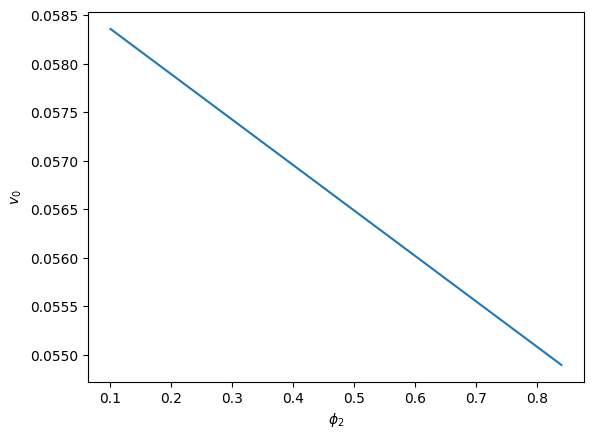

In [3]:
print(p_input)
print(volumes)
v_out = []
component_ID = 0
# for mat in phase_fractions:
#     p_out.append(mat[1,1])

for vector in volumes:
    v_out.append(vector[component_ID])
import matplotlib.pyplot as plt

plt.plot(p_input,v_out)
plt.xlabel(r'$\phi_{}$'.format(num_comp-1))
plt.ylabel(r'$v_{}$'.format(component_ID))

In [10]:
n_ticks = 5
ticks = np.linspace(0,1,n_ticks)
xx,yy = np.meshgrid(ticks, ticks)
x = []
y = []
n_phases = []
for i in range(n_ticks):
    for j in range(n_ticks):
        if (xx[i,j] + yy[i,j] <= 1):
            x.append(xx[i,j])
            y.append(yy[i,j])
            phi_means = np.array([xx[i,j],yy[i,j],1 - xx[i,j] - yy[i,j]])
            print(phi_means)           


[0. 0. 1.]
[0.25 0.   0.75]
[0.5 0.  0.5]
[0.75 0.   0.25]
[1. 0. 0.]
[0.   0.25 0.75]
[0.25 0.25 0.5 ]
[0.5  0.25 0.25]
[0.75 0.25 0.  ]
[0.  0.5 0.5]
[0.25 0.5  0.25]
[0.5 0.5 0. ]
[0.   0.75 0.25]
[0.25 0.75 0.  ]
[0. 1. 0.]


In [2]:
import flory
import numpy as np
num_comp = 3                   # Set number of components
chis = np.array([[0, 6.0,4.0], [6.0, 0,5.0],[4.0,6.0,0]])     # Set the \chi matrix
chis = (1/3)*(chis + chis.T)
print("chis: ", chis)

p0 = 0.2
p1_vals = np.linspace(p0,1 - p0, 10)
p2_vals = []
v0_vals = []
for p1 in p1_vals:
    phi_means = [p0,p1,1-p0-p1]          # Set the average volume fractions

    p2_vals.append(1-p0-p1)
    # obtain coexisting phases
    phases = flory.find_coexisting_phases(num_comp, chis, phi_means)
    v0_vals.append(phases.volumes[0])
    print("phi_means: ", phi_means)
    print("volumes: ", phases.volumes)
    print("fractions")
    for fraction in phases.fractions:
        print(fraction)


chis:  [[0.         4.         2.66666667]
 [4.         0.         3.66666667]
 [2.66666667 3.66666667 0.        ]]


Incompressibility   :   0%|          | 0/5.0 [00:00<?, ?it/s]





Incompressibility   :  66%|██████▌   | 3.3/5.0 [00:04<00:02,  1.22s/it]








Incompressibility   :  80%|████████  | 4.0/5.0 [00:04<00:01,  1.02s/it]








Incompressibility   :  84%|████████▍ | 4.2/5.0 [00:04<00:00,  1.01it/s]








Incompressibility   :  88%|████████▊ | 4.4/5.0 [00:04<00:00,  1.05it/s]








Incompressibility   :  92%|█████████▏| 4.6/5.0 [00:04<00:00,  1.08it/s]








Incompressibility   :  96%|█████████▌| 4.8/5.0 [00:04<00:00,  1.11it/s]








Incompressibility   :  98%|█████████▊| 4.9/5.0 [00:04<00:00,  1.12it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:04<00:00,  1.13it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:04<00:00,  1.11it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:04<00:00,  1.10it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:04<00:00,  1.09it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:04

phi_means:  [0.2, np.float64(0.2), np.float64(0.6000000000000001)]
volumes:  [0.12718483 0.17655064 0.69626453]
fractions
[0.8470589  0.03049268 0.12244847]
[0.02283418 0.94550725 0.03165858]
[0.12672708 0.04192642 0.83134648]


Incompressibility   :   0%|          | 0/5.0 [00:00<?, ?it/s]





Incompressibility   :  56%|█████▌    | 2.8/5.0 [00:00<00:00, 49.83it/s]








Incompressibility   :  70%|███████   | 3.5/5.0 [00:00<00:00, 31.49it/s]








Incompressibility   :  76%|███████▌  | 3.8/5.0 [00:00<00:00, 22.63it/s]








Incompressibility   :  82%|████████▏ | 4.1/5.0 [00:00<00:00, 18.30it/s]








Incompressibility   :  88%|████████▊ | 4.4/5.0 [00:00<00:00, 15.72it/s]








Incompressibility   :  94%|█████████▍| 4.7/5.0 [00:00<00:00, 13.97it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 12.76it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 11.16it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  9.91it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  8.92it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  8.10it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00

phi_means:  [0.2, np.float64(0.2666666666666667), np.float64(0.5333333333333333)]
volumes:  [0.1378458  0.25046616 0.61168803]
fractions
[0.84705878 0.03049266 0.12244863]
[0.02283421 0.94550716 0.03165864]
[0.12672686 0.04192632 0.8313468 ]


Incompressibility   :   0%|          | 0/5.0 [00:00<?, ?it/s]





Incompressibility   :  52%|█████▏    | 2.6/5.0 [00:00<00:00, 46.40it/s]








Incompressibility   :  88%|████████▊ | 4.4/5.0 [00:00<00:00, 39.40it/s]








Incompressibility   :  96%|█████████▌| 4.8/5.0 [00:00<00:00, 28.71it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 22.43it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 17.89it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 14.95it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 12.81it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 11.20it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  9.95it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  8.95it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  8.15it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00

phi_means:  [0.2, np.float64(0.33333333333333337), np.float64(0.4666666666666667)]
volumes:  [0.14850766 0.3243816  0.52711074]
fractions
[0.84705748 0.03049286 0.12244973]
[0.02283412 0.94550724 0.03165865]
[0.12672576 0.04192621 0.831348  ]


Incompressibility   :   0%|          | 0/5.0 [00:00<?, ?it/s]





Incompressibility   :  76%|███████▌  | 3.8/5.0 [00:00<00:00, 38.32it/s]








Incompressibility   :  84%|████████▍ | 4.2/5.0 [00:00<00:00, 26.98it/s]








Incompressibility   :  90%|█████████ | 4.5/5.0 [00:00<00:00, 21.26it/s]








Incompressibility   :  96%|█████████▌| 4.8/5.0 [00:00<00:00, 17.91it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 15.41it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 13.11it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 11.42it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 10.11it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  7.52it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  6.89it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  6.40it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00

phi_means:  [0.2, np.float64(0.4), np.float64(0.4)]
volumes:  [0.15916916 0.39829706 0.44253378]
fractions
[0.84705642 0.03049301 0.12245067]
[0.02283408 0.94550724 0.0316587 ]
[0.12672478 0.04192606 0.83134912]


Incompressibility   :   0%|          | 0/5.0 [00:00<?, ?it/s]





Incompressibility   :  72%|███████▏  | 3.6/5.0 [00:00<00:00, 64.76it/s]








Incompressibility   :  82%|████████▏ | 4.1/5.0 [00:00<00:00, 37.18it/s]








Incompressibility   :  88%|████████▊ | 4.4/5.0 [00:00<00:00, 26.58it/s]








Incompressibility   :  94%|█████████▍| 4.7/5.0 [00:00<00:00, 21.15it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 17.93it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 14.96it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 12.84it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 11.22it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  9.97it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  8.98it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  8.16it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00

phi_means:  [0.2, np.float64(0.46666666666666673), np.float64(0.3333333333333333)]
volumes:  [0.16982826 0.47221245 0.35795929]
fractions
[0.84705843 0.0304927  0.12244893]
[0.0228342  0.94550714 0.03165866]
[0.12672656 0.04192627 0.83134714]


Incompressibility   :   0%|          | 0/5.0 [00:00<?, ?it/s]





Incompressibility   :  68%|██████▊   | 3.4/5.0 [00:00<00:00, 61.23it/s]








Incompressibility   :  84%|████████▍ | 4.2/5.0 [00:00<00:00, 25.69it/s]








Incompressibility   :  90%|█████████ | 4.5/5.0 [00:00<00:00, 20.53it/s]








Incompressibility   :  96%|█████████▌| 4.8/5.0 [00:00<00:00, 17.39it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 15.06it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 12.90it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 11.27it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 10.01it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  9.02it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  8.20it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  7.50it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00

phi_means:  [0.2, np.float64(0.5333333333333334), np.float64(0.2666666666666666)]
volumes:  [0.18048207 0.5461277  0.27339023]
fractions
[0.8470693  0.0304912  0.12243941]
[0.02283471 0.94550706 0.03165822]
[0.12673645 0.0419277  0.83133591]


Incompressibility   :   0%|          | 0/5.0 [00:00<?, ?it/s]





Incompressibility   :  72%|███████▏  | 3.6/5.0 [00:00<00:00, 65.53it/s]








Incompressibility   :  84%|████████▍ | 4.2/5.0 [00:00<00:00, 37.62it/s]








Incompressibility   :  90%|█████████ | 4.5/5.0 [00:00<00:00, 26.93it/s]








Incompressibility   :  98%|█████████▊| 4.9/5.0 [00:00<00:00, 22.02it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 17.52it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 14.64it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 12.57it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 11.00it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  9.80it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  8.03it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  7.98it/s]
Field Error         : 100%|██████████| 5.0/5.0 [00:00<00:00, 

phi_means:  [0.2, np.float64(0.6000000000000001), np.float64(0.19999999999999996)]
volumes:  [0.19114502 0.62004318 0.1888118 ]
fractions
[0.84706696 0.03049157 0.12244141]
[0.02283456 0.94550719 0.03165825]
[0.12673443 0.04192748 0.83133815]


Incompressibility   :   0%|          | 0/5.0 [00:00<?, ?it/s]





Incompressibility   :  70%|███████   | 3.5/5.0 [00:00<00:00, 61.99it/s]








Incompressibility   :  86%|████████▌ | 4.3/5.0 [00:00<00:00, 37.49it/s]








Incompressibility   :  94%|█████████▍| 4.7/5.0 [00:00<00:00, 27.53it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 22.08it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 17.62it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 14.68it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 12.58it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 11.04it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  9.82it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  9.75it/s]
Field Error         : 100%|██████████| 5.0/5.0 [00:00<00:00,  9.76it/s]
Volume Error        : 100%|██████████| 5.0/5.0 [00:00<00:00,  9.77it/

phi_means:  [0.2, np.float64(0.6666666666666667), np.float64(0.1333333333333333)]
volumes:  [0.20180641 0.69395858 0.10423501]
fractions
[0.84706722 0.03049159 0.12244113]
[0.02283451 0.94550735 0.03165815]
[0.12673479 0.04192764 0.83133766]


Incompressibility   :   0%|          | 0/5.0 [00:00<?, ?it/s]





Incompressibility   :  46%|████▌     | 2.3/5.0 [00:00<00:00, 40.84it/s]








Incompressibility   :  78%|███████▊  | 3.9/5.0 [00:00<00:00, 34.41it/s]








Incompressibility   :  84%|████████▍ | 4.2/5.0 [00:00<00:00, 24.99it/s]








Incompressibility   :  88%|████████▊ | 4.4/5.0 [00:00<00:00, 19.67it/s]








Incompressibility   :  92%|█████████▏| 4.6/5.0 [00:00<00:00, 16.29it/s]








Incompressibility   :  96%|█████████▌| 4.8/5.0 [00:00<00:00, 14.16it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 12.65it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 11.08it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  8.94it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  8.13it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00,  7.44it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00

phi_means:  [0.2, np.float64(0.7333333333333334), np.float64(0.06666666666666665)]
volumes:  [0.21246793 0.7678739  0.01965818]
fractions
[0.84706741 0.03049168 0.12244089]
[0.02283443 0.9455076  0.03165798]
[0.12673514 0.04192787 0.83133704]


Incompressibility   :   0%|          | 0/5.0 [00:00<?, ?it/s]





Incompressibility   :  98%|█████████▊| 4.9/5.0 [00:00<00:00, 49.39it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 31.65it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 30.75it/s]
Field Error         : 100%|██████████| 5.0/5.0 [00:00<00:00, 30.90it/s]
Volume Error        : 100%|██████████| 5.0/5.0 [00:00<00:00, 31.07it/s]
Constraint Residue  : 100%|██████████| 5.0/5.0 [00:00<00:00, 31.20it/s]
Revive Count Left   : 384

phi_means:  [0.2, np.float64(0.8), np.float64(0.0)]
volumes:  [0.18668539 0.81331461]
fractions
[0.97875201 0.02124799 0.        ]
[0.02124799 0.97875201 0.        ]


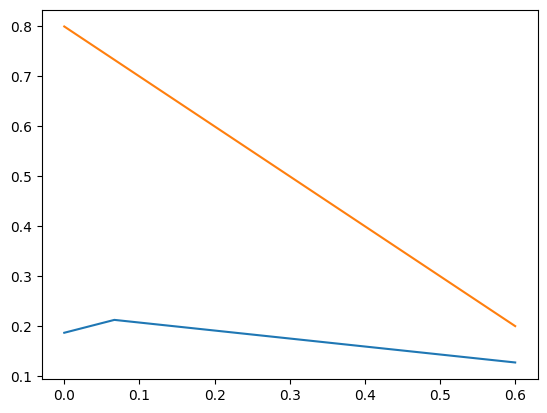

In [57]:
import matplotlib.pyplot as plt

plt.plot(p2_vals, v0_vals)
plt.plot(p2_vals, p1_vals)
plt.show()

In [16]:
# check the lever rule for binary systems
print("phases: ", phases.fractions)
V1 = (phases.fractions[1][0]-phi_means[0])/(phases.fractions[1][0]-phases.fractions[0][0])
V2 = (phi_means[0]-phases.fractions[0][0])/(phases.fractions[1][0]-phases.fractions[0][0])
print("From lever rule, V1,V2 = ", V1, V2)
print("From output: ", phases.volumes)

phases:  [[0.97875201 0.02124799]
 [0.02124799 0.97875201]]
From lever rule, V1,V2 =  0.7088764067400548 0.29112359325994513
From output:  [0.70887641 0.29112359]


In [2]:
import flory

num_comp = 2                    # Set number of components
chis = [[0, 4.0], [4.0, 0]]     # Set the \chi matrix
phi_means = [0.7, 0.3]          # Set the average volume fractions

# create a free energy
fh = flory.FloryHuggins(num_comp, chis)
# create a ensemble
ensemble = flory.CanonicalEnsemble(num_comp, phi_means)
# construct a finder from interaction, entropy and ensemble
finder = flory.CoexistingPhasesFinder(fh.interaction, fh.entropy, ensemble)
# obtain phases by clustering compartments 
phases = finder.run().get_clusters()
print(phases)

Incompressibility   :   0%|          | 0/5.0 [00:00<?, ?it/s]





Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 128.38it/s]








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 73.48it/s] 








Incompressibility   : 100%|██████████| 5.0/5.0 [00:00<00:00, 69.99it/s]
Field Error         : 100%|██████████| 5.0/5.0 [00:00<00:00, 71.19it/s]
Volume Error        : 100%|██████████| 5.0/5.0 [00:00<00:00, 72.36it/s]
Constraint Residue  : 100%|██████████| 5.0/5.0 [00:00<00:00, 72.97it/s]
Revive Count Left   : 256

Phases(volumes=[ 4.65797749 11.34202251], fractions=[[0.02124799 0.97875201]
 [0.97875201 0.02124799]])
